In [3]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [5]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [6]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)


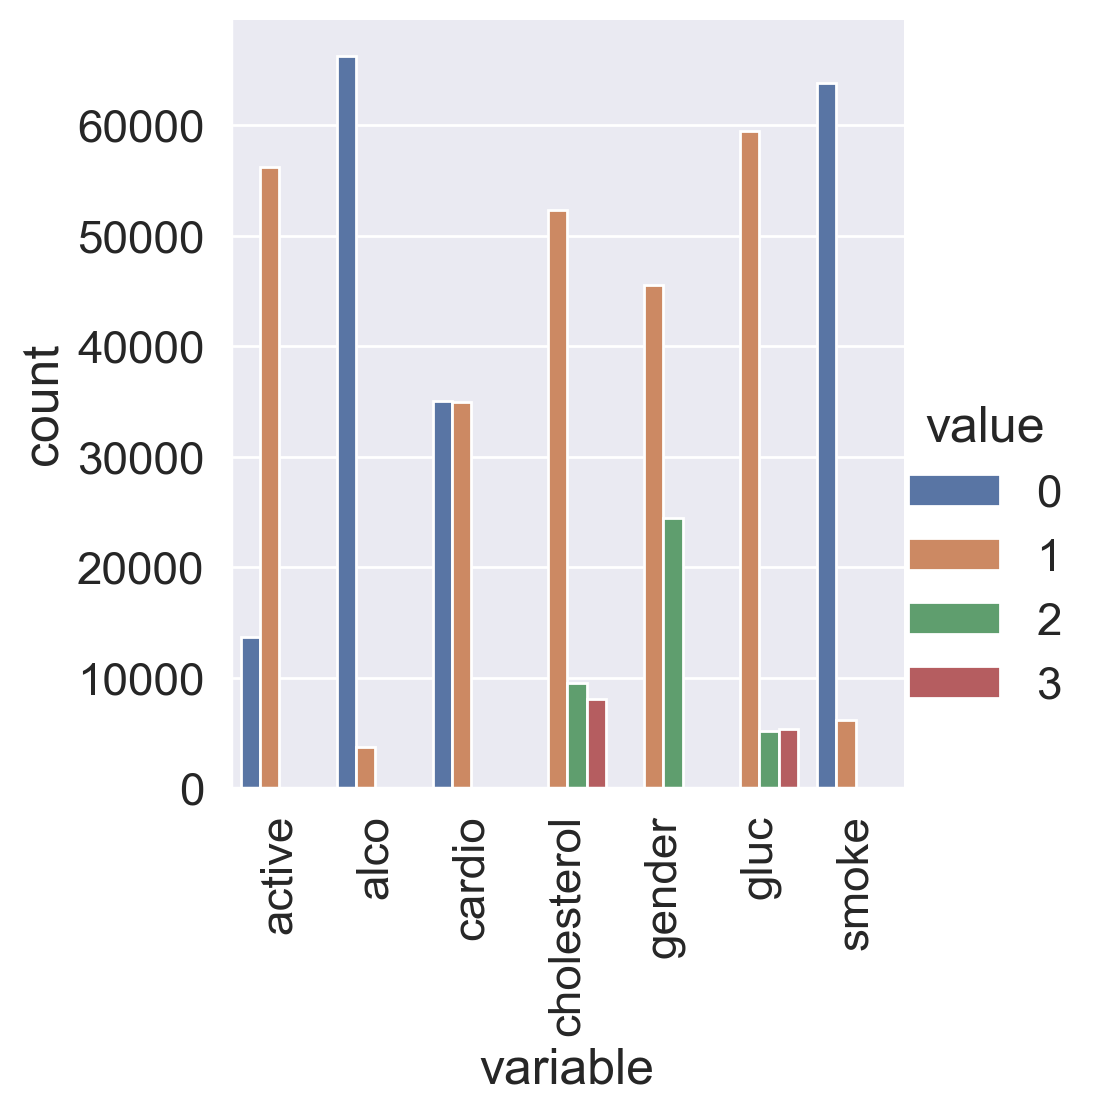

In [8]:
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

In [9]:
df_uniques.head()

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021


In [10]:
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

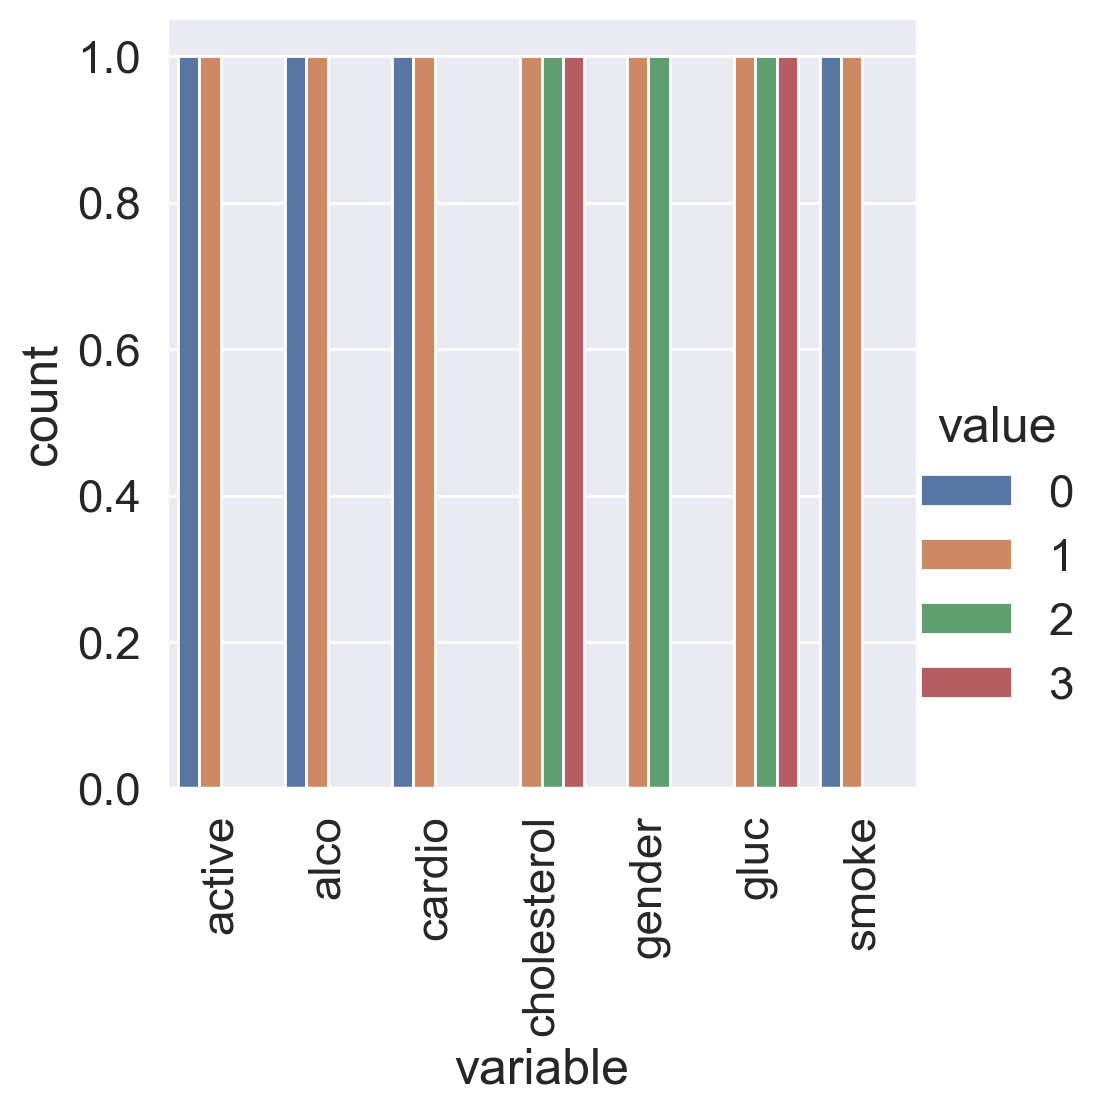

In [11]:
sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind='bar'
)
plt.xticks(rotation='vertical');

In [12]:
df_uniques_2 = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars= ["cardio"],
)
df_uniques_2.head()

,cardio,variable,value
0,0,gender,2
1,1,gender,1
2,1,gender,1
3,1,gender,2
4,0,gender,1


In [13]:
df_uniques_2 = (
    pd.DataFrame(df_uniques_2.groupby(["variable", "value", "cardio"])["value"].count())
    .rename(columns={"value": "count"})
    .sort_index(level=[0, 1])
    .reset_index()
)

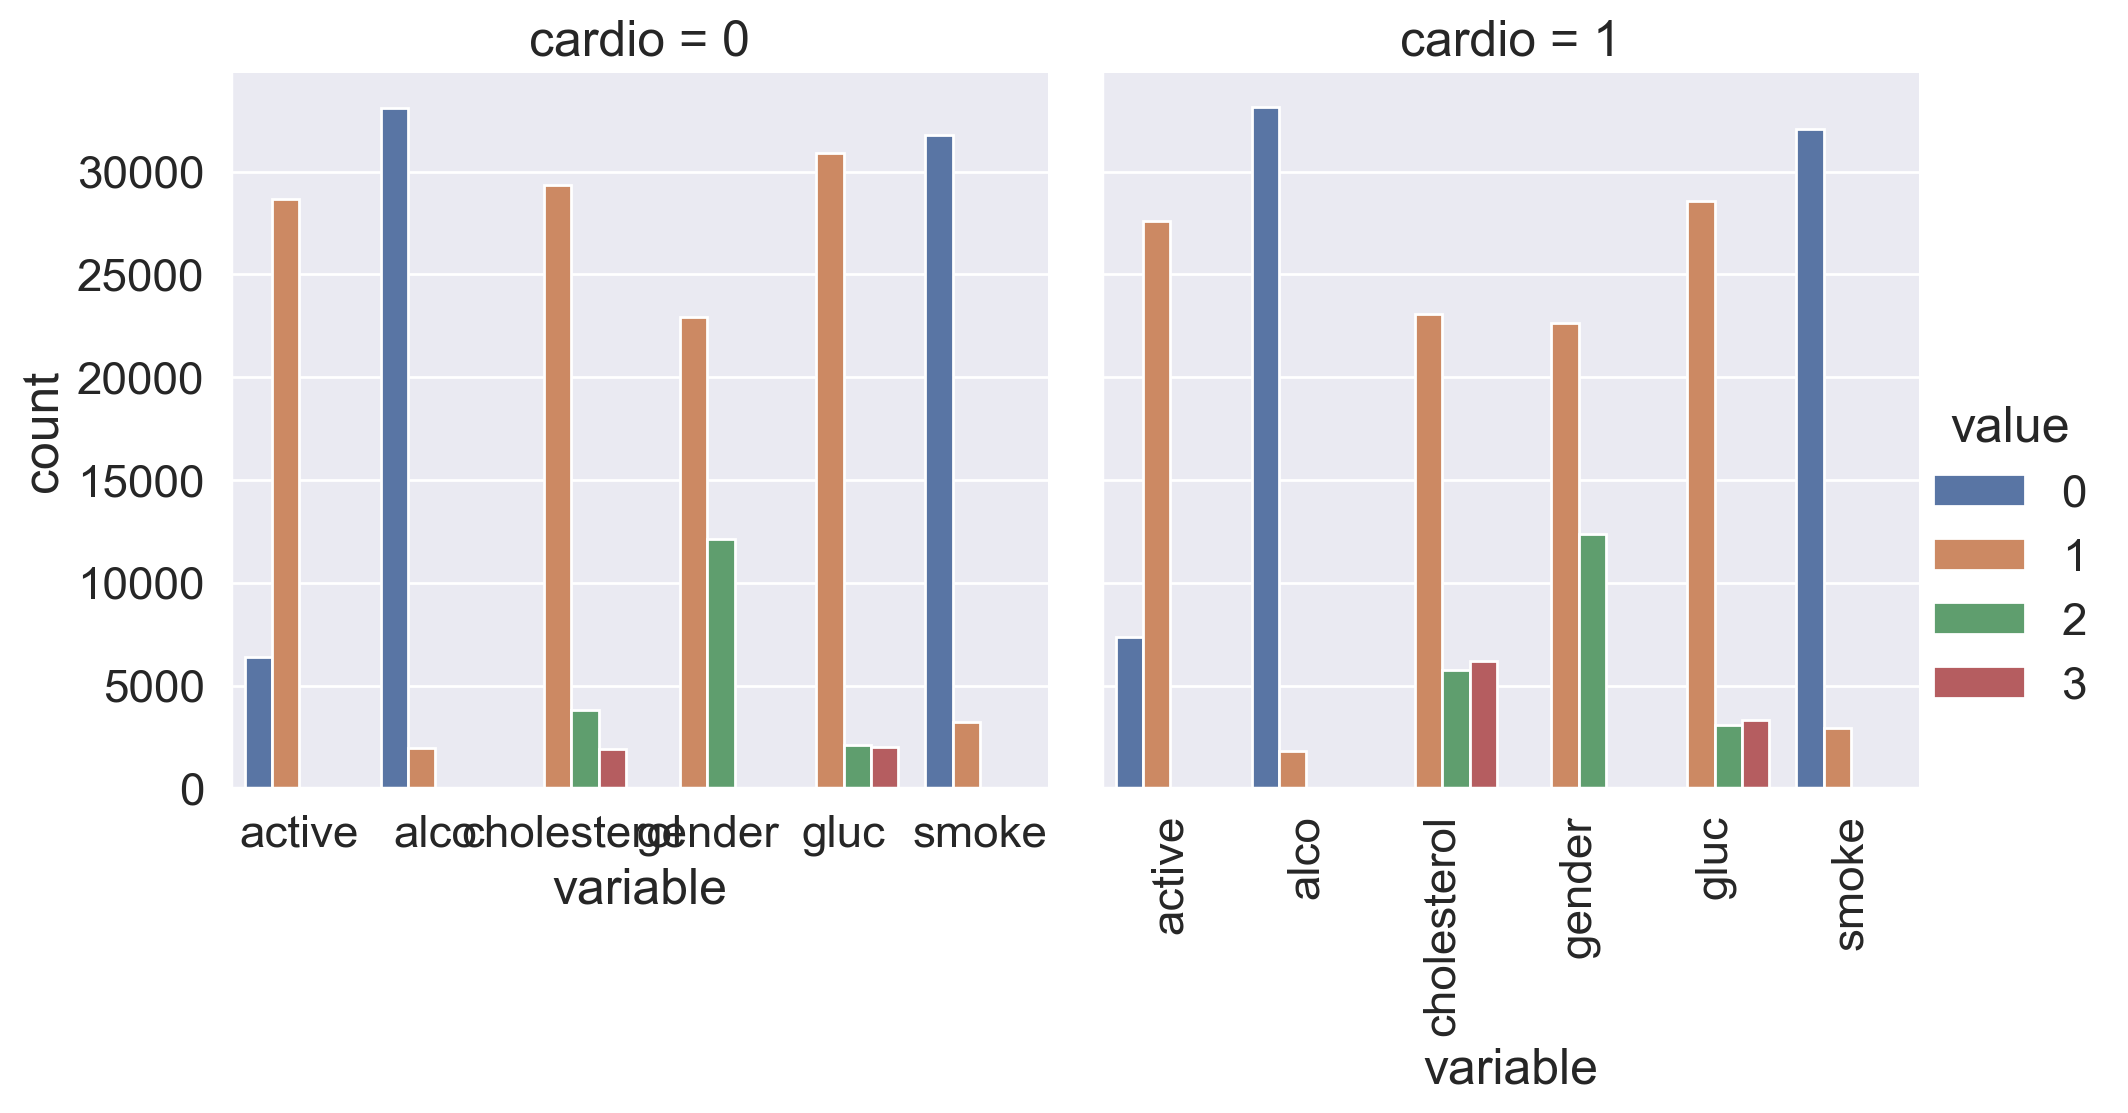

In [14]:
sns.catplot(
    data=df_uniques_2,
    x='variable',
    y='count',
    hue='value',
    col='cardio',
    kind='bar'
)

plt.xticks(rotation='vertical');

In [15]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


### Сколько мужчин и женщин присутствует в этом наборе данных? Значения гендерного признака не были указаны (обозначает ли “1” женщин или мужчин) – выясните это, проанализировав рост, сделав предположение, что мужчины в среднем выше.

In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
task1 = df[['gender', 'height']]

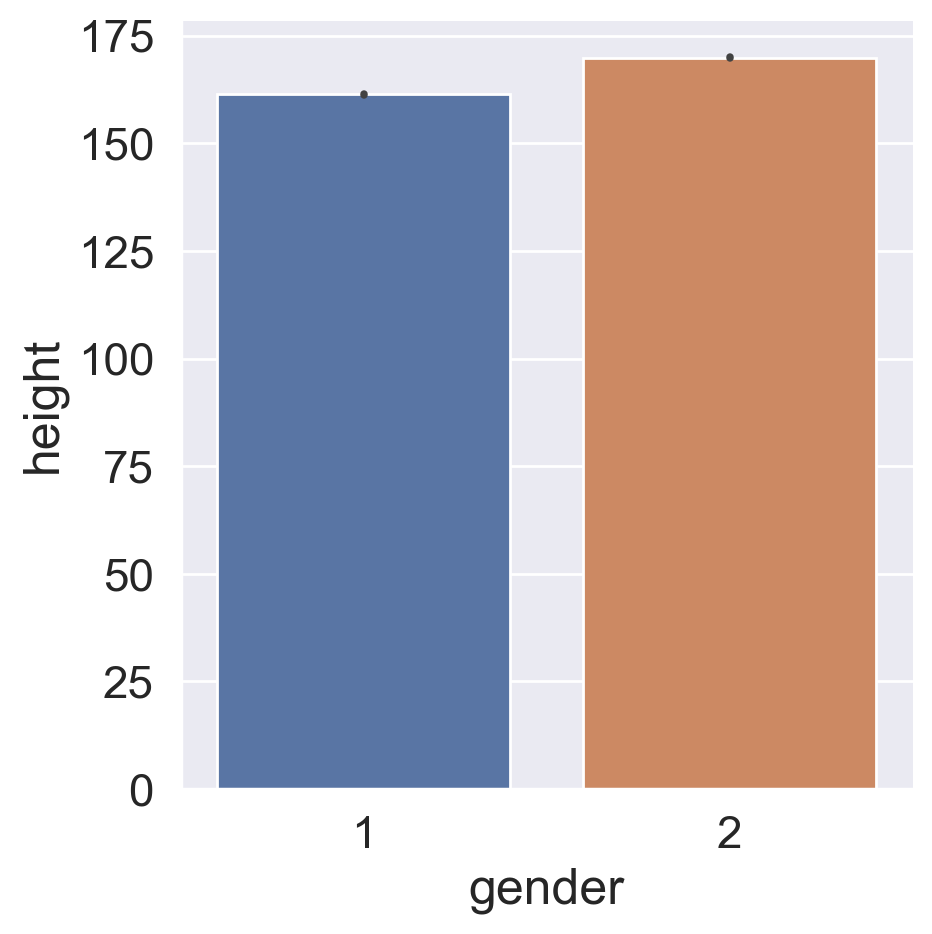

In [18]:
sns.catplot(
    data=task1,
    x='gender',
    y='height',
    kind='bar'
)

### Кто чаще сообщает о потреблении алкоголя – мужчины или женщины?

In [19]:
task2 = df[['gender', 'alco']]

In [20]:
task2 = pd.DataFrame(task2.groupby(['gender','alco'])['alco'].count()).rename(columns={'alco':'count'}).reset_index()

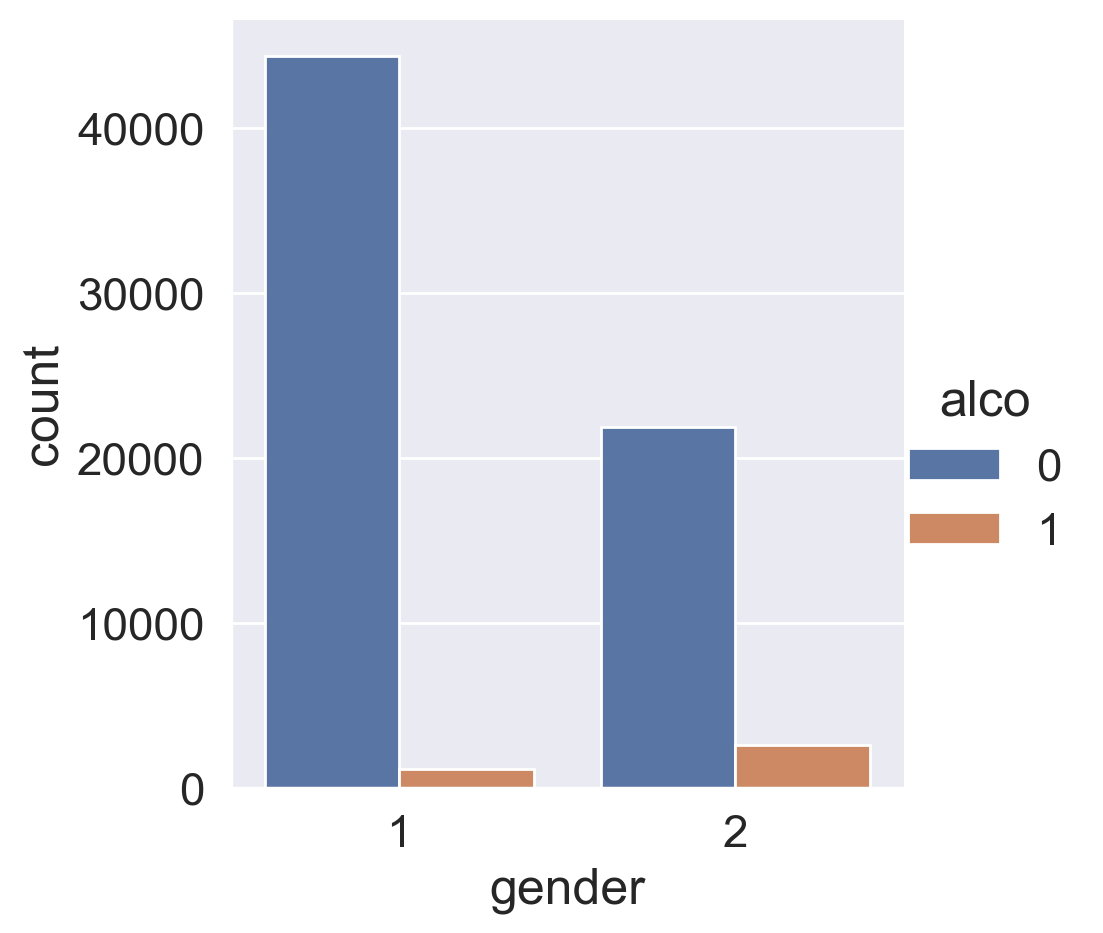

In [21]:
sns.catplot(
    data=task2,
    x='gender',
    y='count',
    hue='alco',
    kind='bar'
);

### Какова округленная разница между процентами курильщиков среди мужчин и женщин?

In [22]:
task3 = df[['gender', 'smoke']]

In [23]:
task3 = pd.DataFrame(task3.groupby(['gender', 'smoke'])['smoke'].count()).rename(columns={"smoke":'count'}).reset_index()

In [24]:
task3

,gender,smoke,count
0,1,0,44717
1,1,1,813
2,2,0,19114
3,2,1,5356


In [25]:
round((5356 / (19114+5356)) - (813/ (813+44717)),3) # 20%

0.201

### Какова округленная разница между средними значениями возраста (в месяцах) для некурящих и курильщиц? Вам нужно будет определить единицы измерения возраста объекта в этом наборе данных.

In [26]:
task4 = df[['gender','age','smoke']]

In [27]:
task4.groupby("smoke")['age'].median()


smoke
0    19722.0
1    19125.0
Name: age, dtype: float64

In [28]:
(19722 - 19125) / 365.25 * 12 

19.613963039014372

### Рассчитайте доли больных людей (с сердечно-сосудистыми заболеваниями) в двух группах людей, описанных в задании. Каково соотношение этих двух фракций?

In [29]:
task5 = df

In [30]:
task5['age'] = task5['age'].map(lambda x: x/365.25).round().astype(int)

In [31]:
task5 = task5.query("(age >= 60) & (age <= 64) & (smoke == 1) & (gender == 2)")

In [32]:
task5.shape

(987, 13)

In [33]:
task5['cholesterol'] = task5['cholesterol'].map({1:"4", 2:"5-7", 3:"8"})

In [34]:
task5['cholesterol'].value_counts()

4      648
8      175
5-7    164
Name: cholesterol, dtype: int64

### Выберите правильные утверждения:
1. Средний ИМТ в выборке находится в пределах нормальных значений?
2. ИМТ женщин в среднем выше, чем у мужчин?
3. У здоровых людей средний ИМТ выше, чем у больных?
4. В сегменте здоровых и непьющих мужчин ИМТ ближе к норме, чем в сегменте здоровых и непьющих женщин?

In [37]:
task6 = df

In [38]:
task6.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
task6['IMT'] = task6['weight'] / ((task6["height"] / 100) ** 2)

In [40]:
#Медианный ИМТ в выборке находится в пределах нормальных значений.
task6['IMT'].median()
#Нет

26.374068120774975

In [41]:
#ИМТ женщин в среднем выше, чем у мужчин.
task6.groupby('gender').agg({"IMT":"mean"}).reset_index()
#Да
#У здоровых людей средний ИМТ выше, чем у больных.

,gender,IMT
0,1,27.987583
1,2,26.754442


### Какой процент исходных данных (округленных) мы отфильтровали на предыдущем шаге?

In [42]:
task7 = df

In [43]:
task7.groupby('cardio').agg({"IMT":"median"})

,IMT
cardio,
0,25.476660
1,27.471384


In [44]:
#В сегменте здоровых и непьющих мужчин ИМТ ближе к норме, чем в сегменте здоровых и непьющих женщин
task7.groupby(['gender',"alco","cardio"]).agg({"IMT":"median"})
#Да

IMT
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [45]:
task8 = df

In [46]:
task8.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMT
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [47]:
#диастолическое давление выше систолического
#высота строго меньше 2,5 процентиля (используйте pd.Series.квантиль для вычисления этого значения. Если вы не знакомы с этой функцией, пожалуйста, ознакомьтесь с документацией.)
#рост строго превышает 97,5 процентиля
#вес строго меньше 2,5 процентиля
#вес строго превышает 97,5 процентиля
task8 = task8[(task8['ap_lo'] <= task8['ap_hi']) & 
              (task8['height'] >= task8['height'].quantile(.025)) & 
              (task8['height'] <= task8['height'].quantile(.975)) &
              (task8['weight'] >= task8['weight'].quantile(.025)) &
              (task8['weight'] <= task8['weight'].quantile(.975)) 
             ]


In [48]:
100 - 63259*100/70000

9.629999999999995

### Какая пара признаков имеет наиболее сильную корреляцию Пирсона с гендерным признаком?

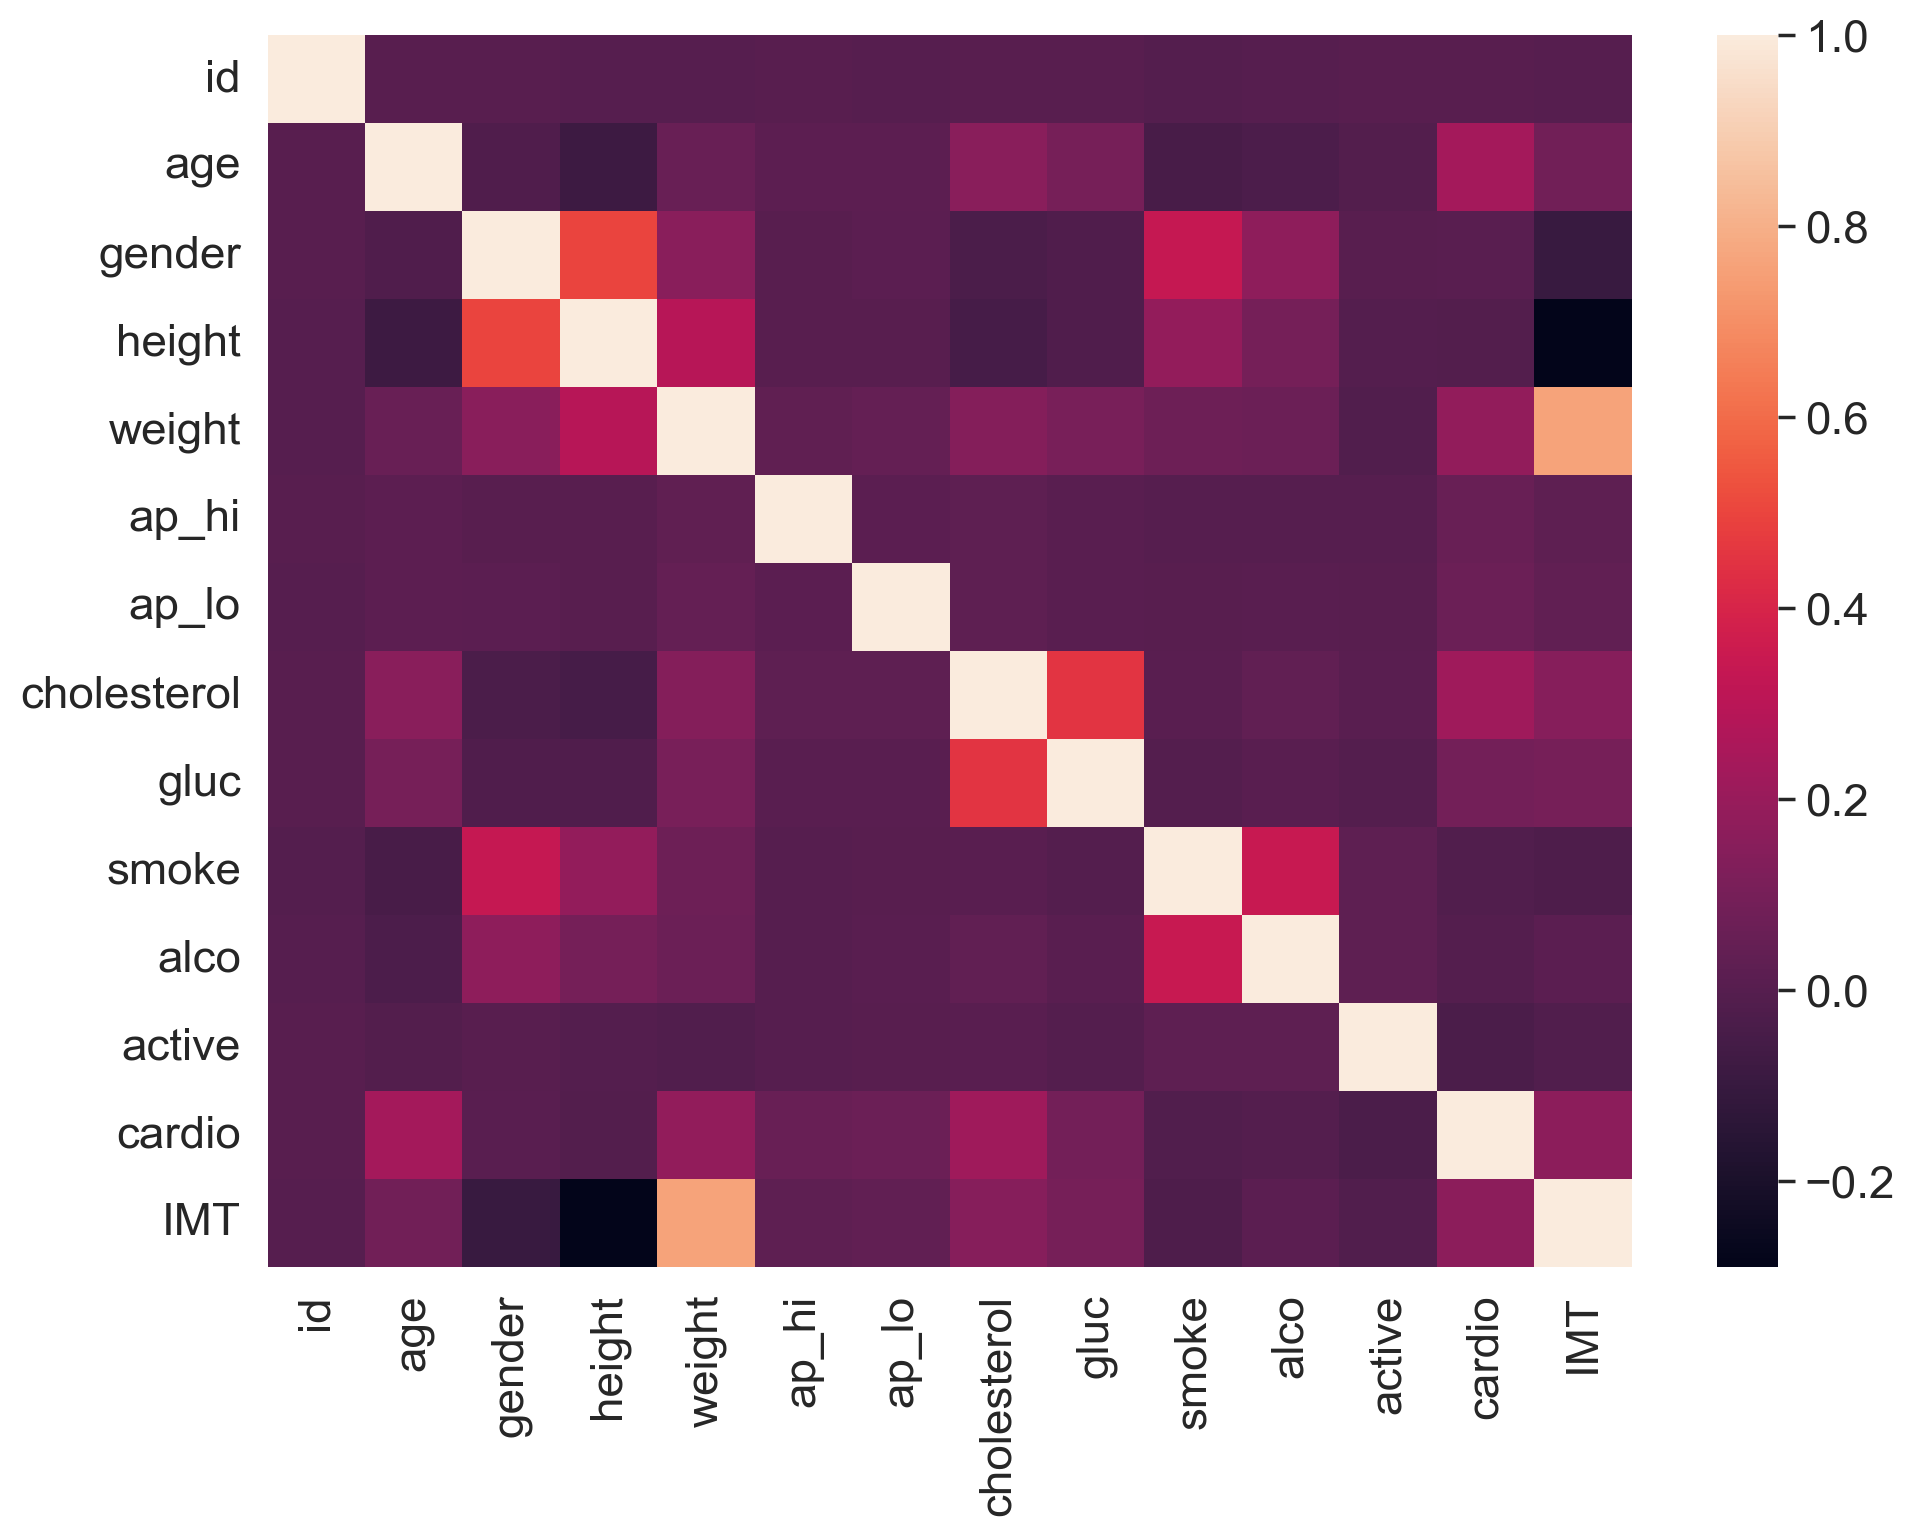

In [49]:
sns.heatmap(df.corr());

In [50]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMT
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


### Создайте график скрипки для высоты и пола, используя violinplot(). Используйте параметры:

In [51]:
df_uniquesdf_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)

In [52]:
step9= pd.melt(
    frame=df,
    value_vars=["height"],
    id_vars=['gender']
)

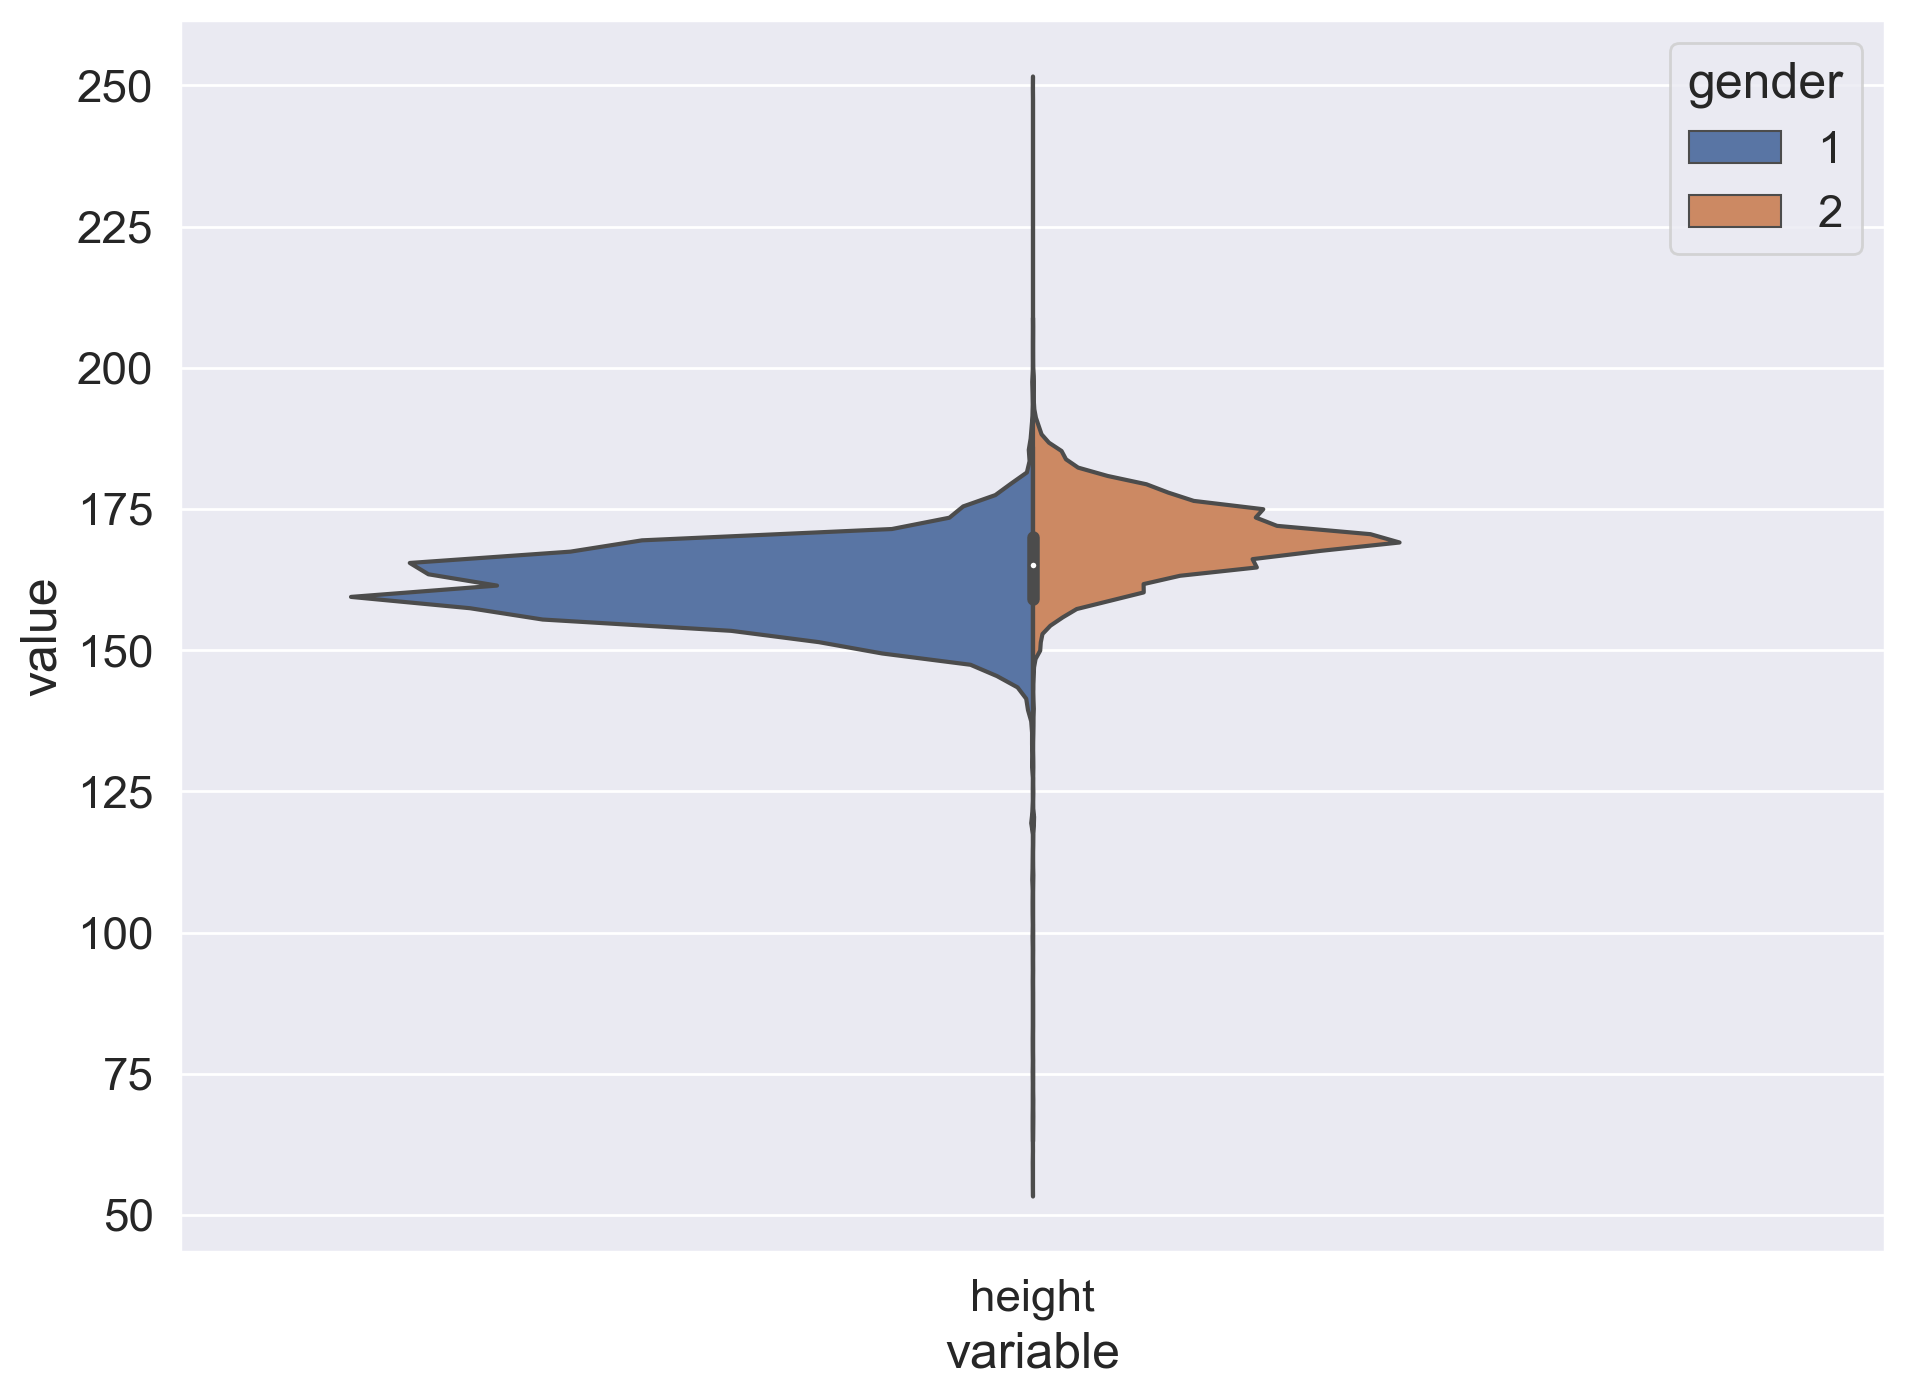

In [53]:
sns.violinplot(data=step9, 
               x='variable',
               y='value', 
               hue='gender',
               split=True,
               scale="count"
               );

### Какая пара признаков имеет самую сильную ранговую корреляцию Спирмена?

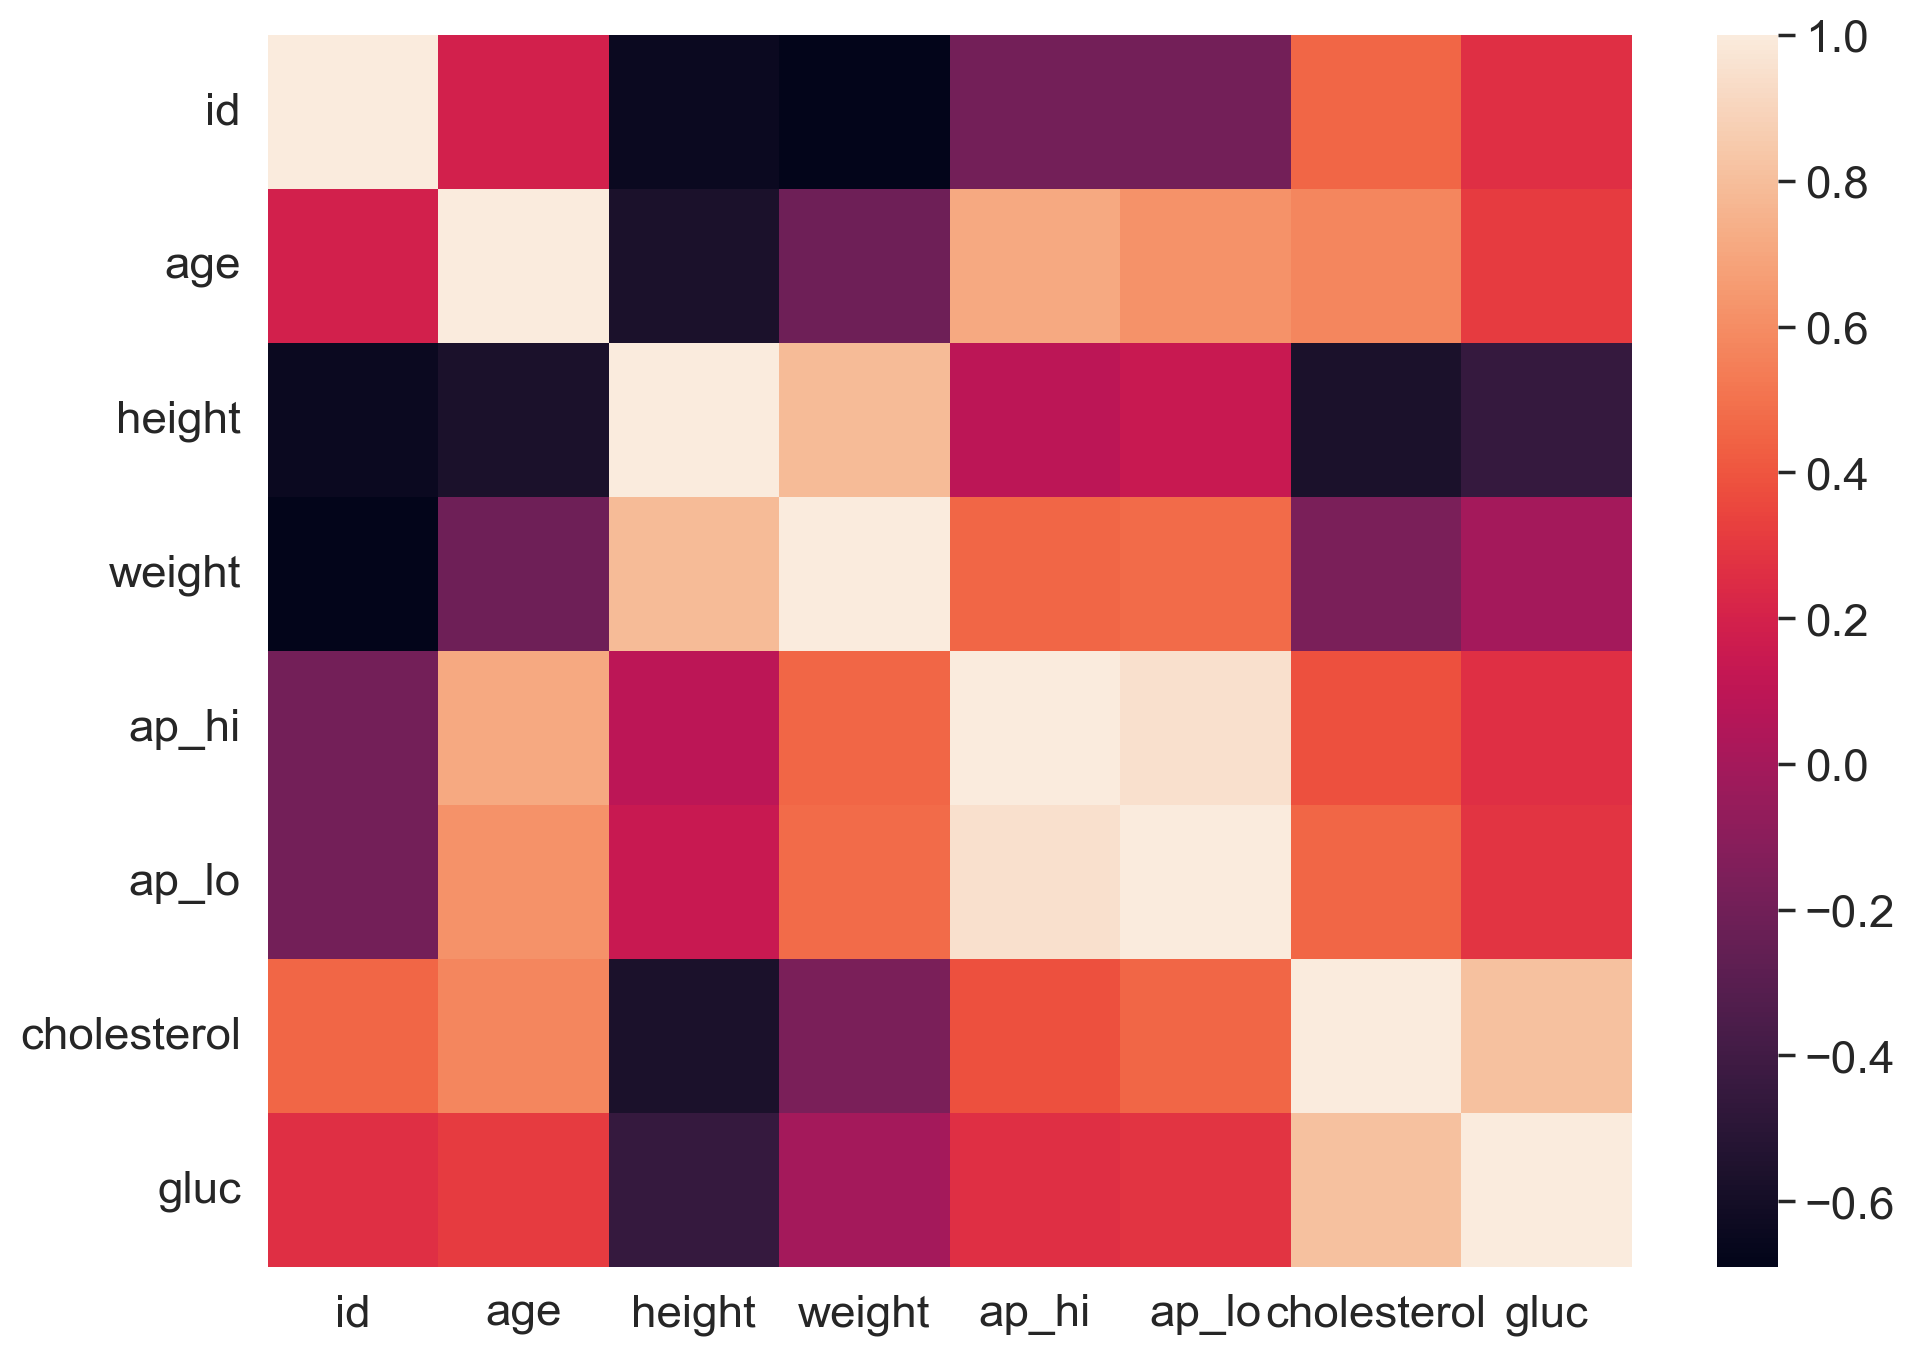

In [54]:
sns.heatmap(df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman').corr('spearman'));

### Создайте график подсчета с помощью функции countplot() с указанием возраста по оси X и количества людей по оси Y. Ваш результирующий график должен содержать два столбца для каждого возраста,  соответствующих количеству людей для каждого кардио-класса этого возраста.

In [55]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMT
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


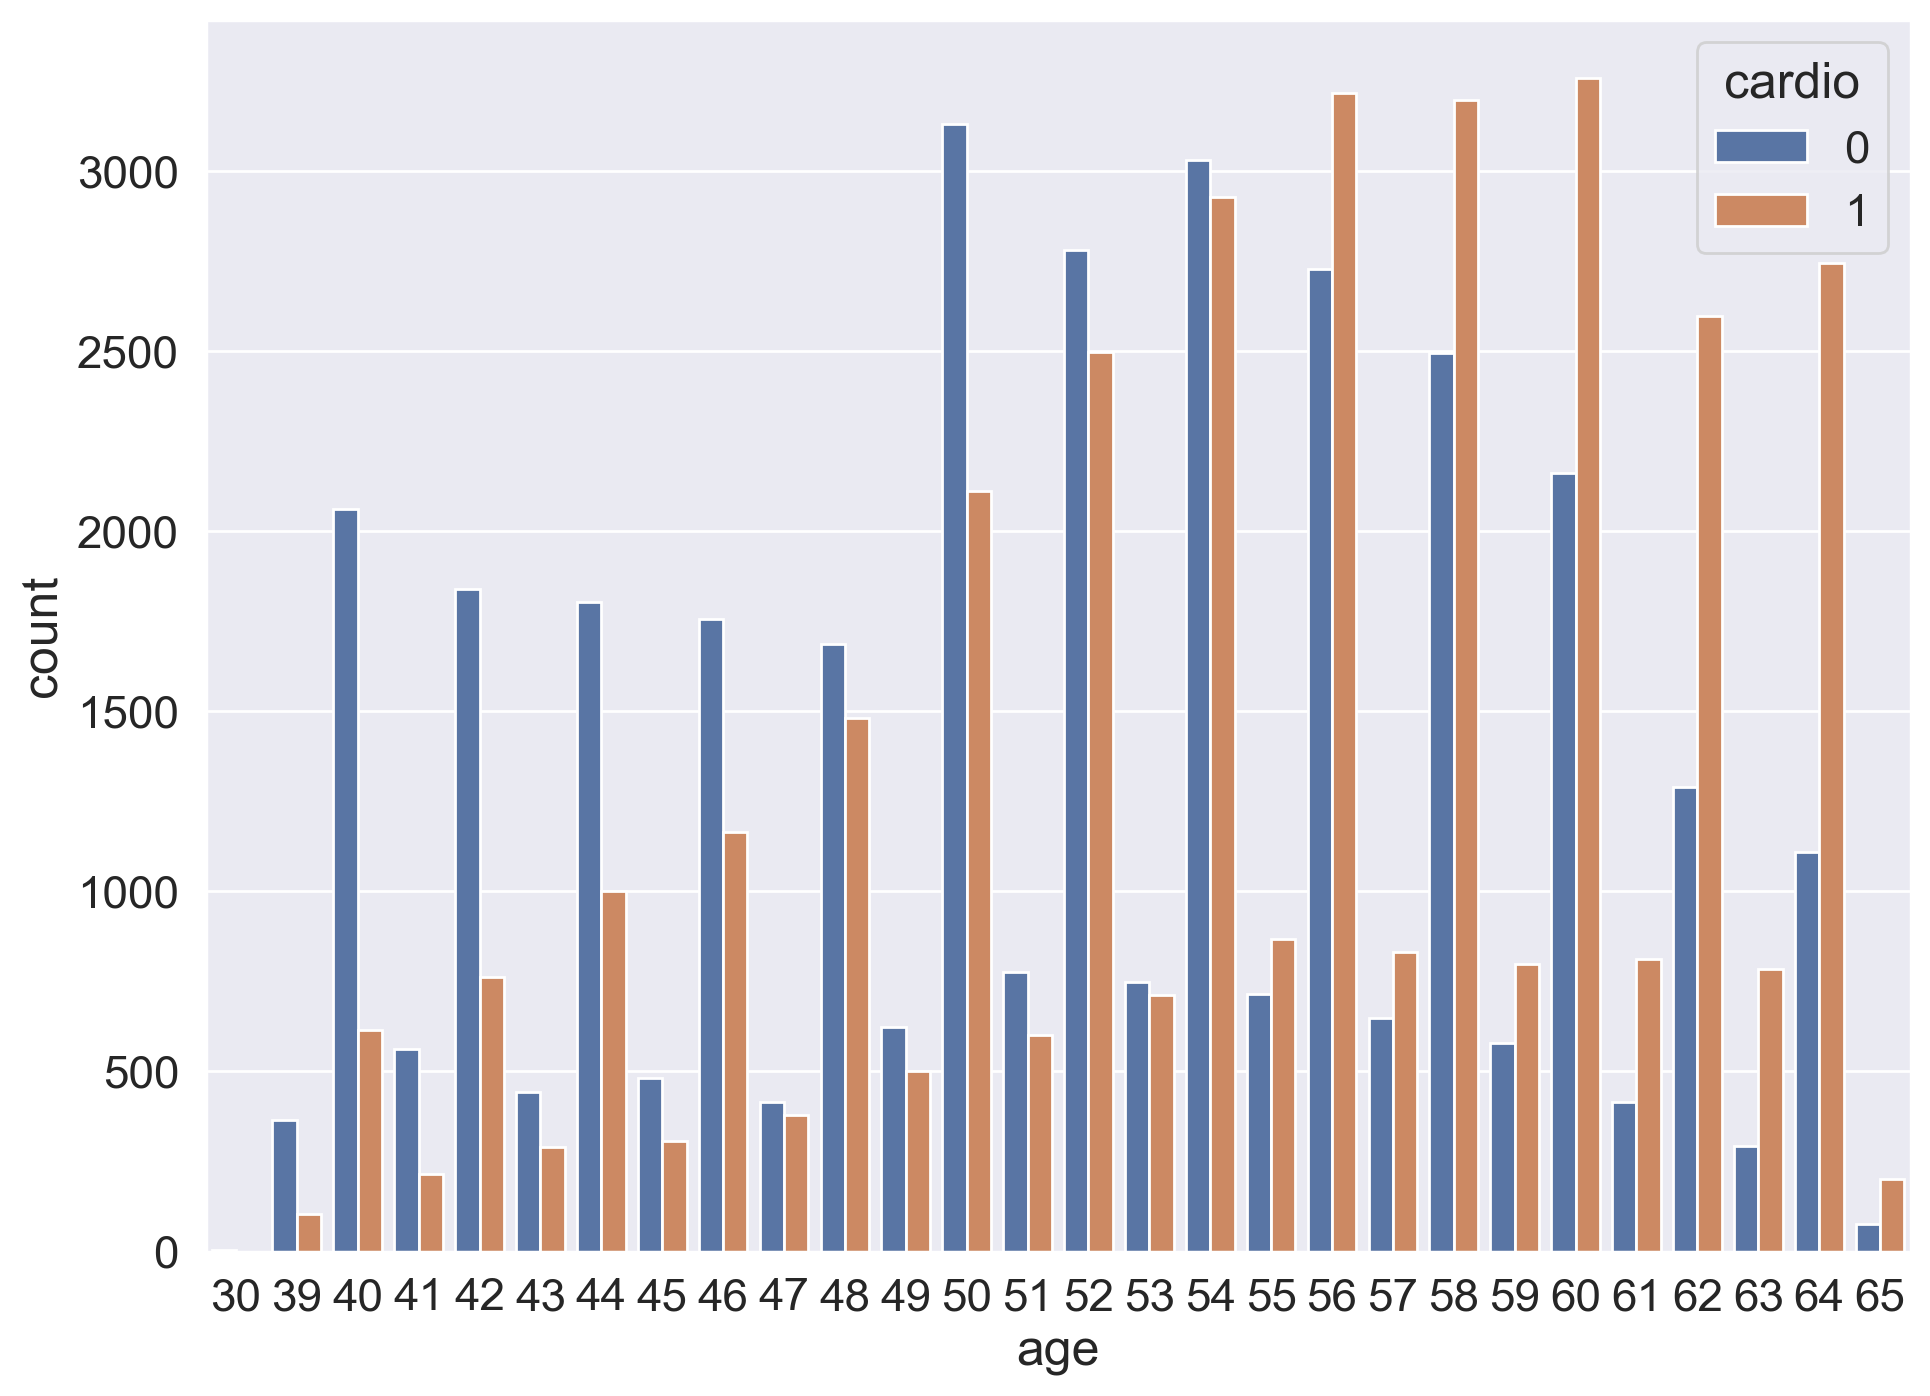

In [56]:
sns.countplot(x='age',hue='cardio',data=df);

### Создайте две диаграммы kdeplots объекта height для каждого пола на одной диаграмме. Вы увидите разницу между полами более четко, но не сможете оценить количество записей в каждом из них.

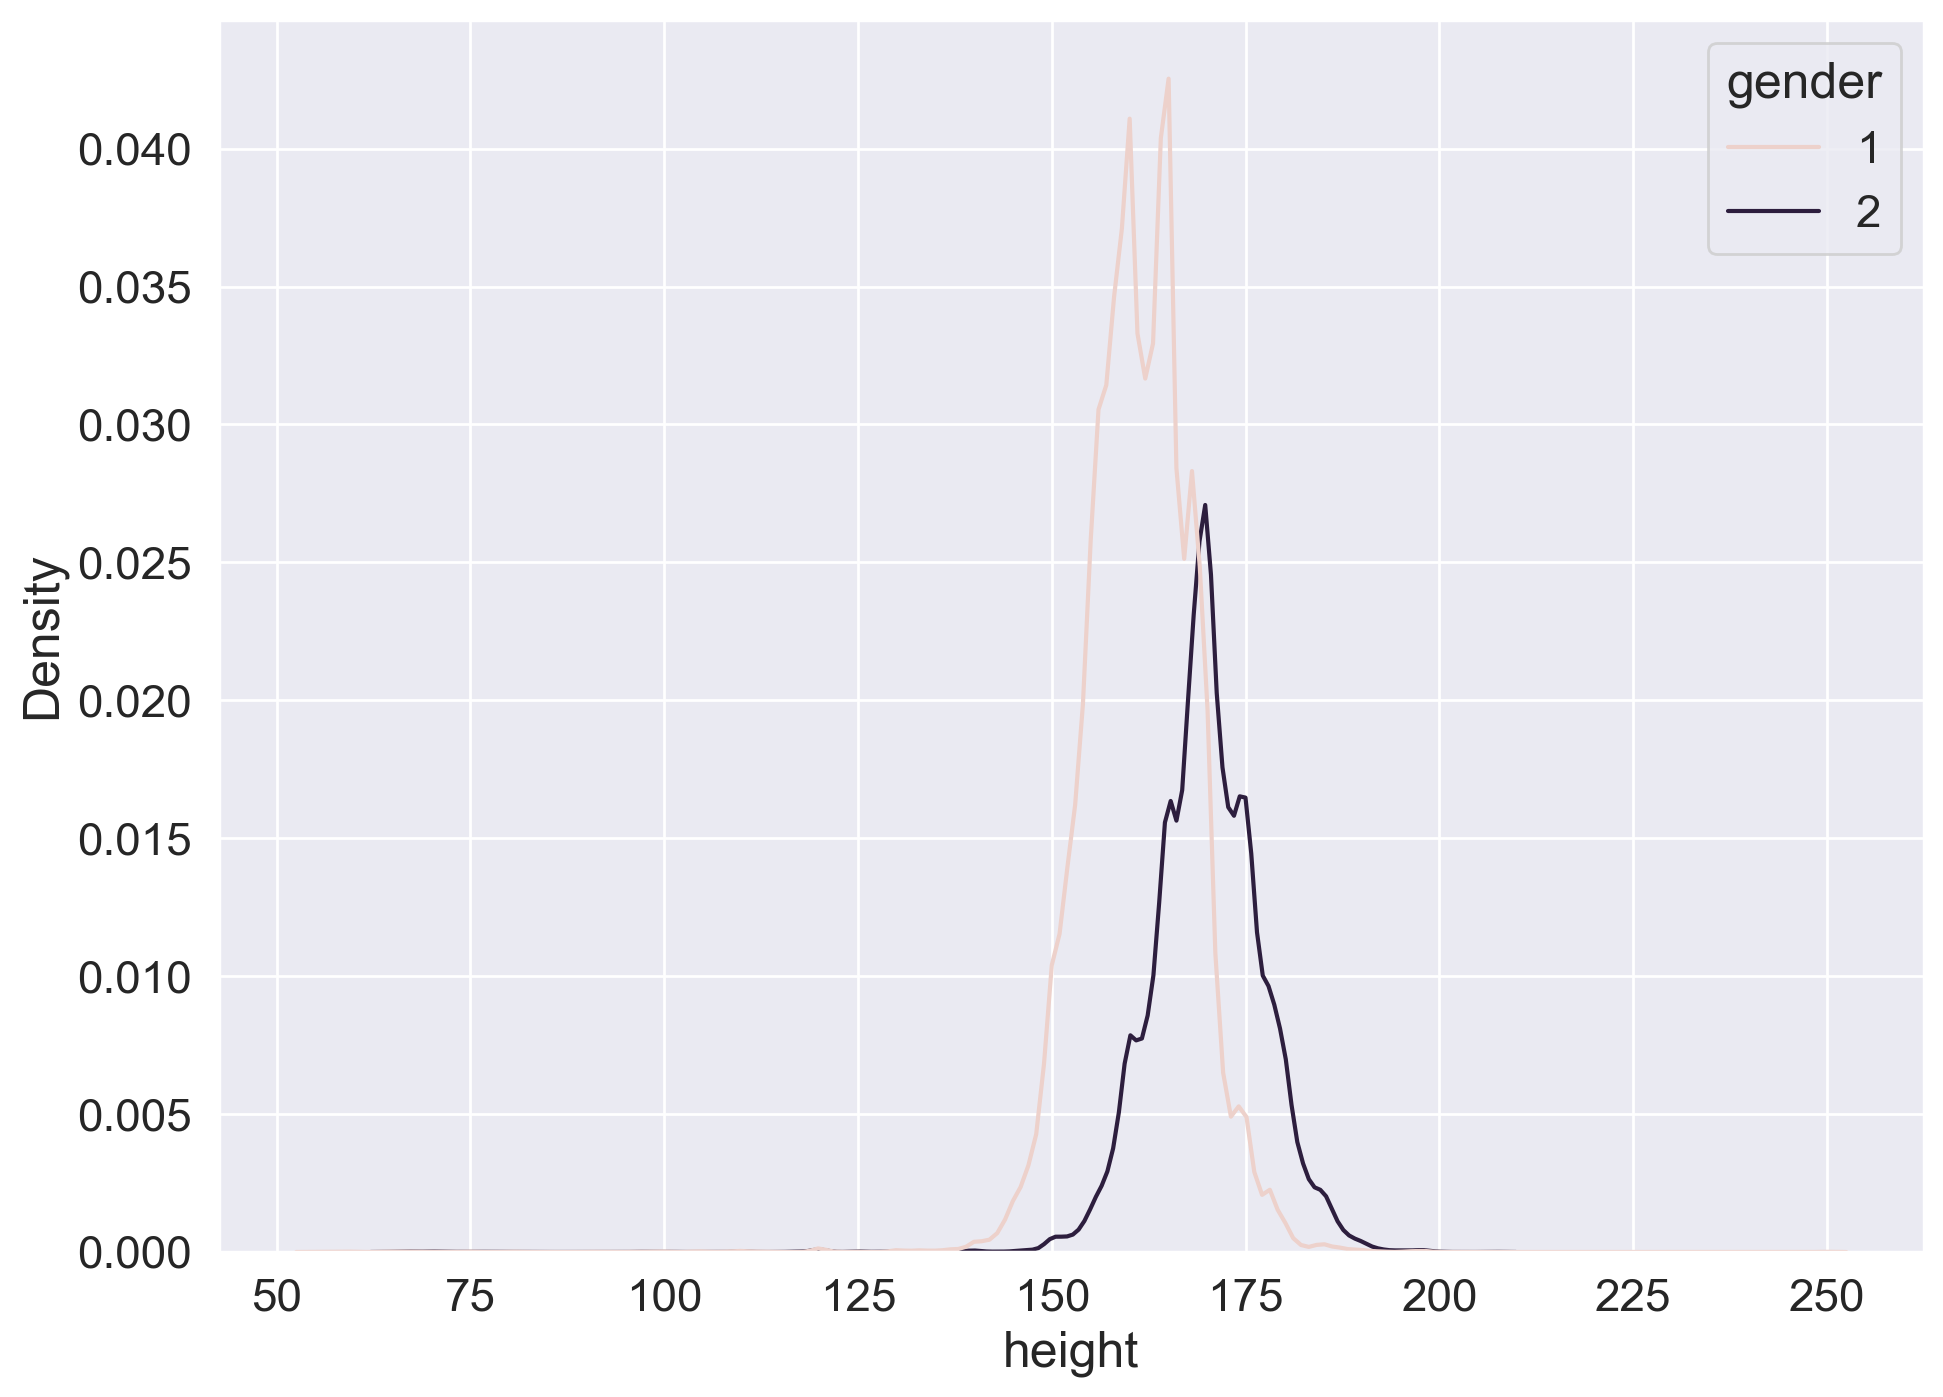

In [58]:
sns.kdeplot(
    data=df,
    x="height",
    hue='gender'
);